# AAAAAAAAAAAAAAAaaaaaaaaaaaaaaahaaaaaaa

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

from pydataset import data


In [2]:
data().head()

dataset_id                                        title
0  AirPassengers  Monthly Airline Passenger Numbers 1949-1960
1        BJsales            Sales Data with Leading Indicator
2            BOD                    Biochemical Oxygen Demand
3   Formaldehyde                Determination of Formaldehyde
4   HairEyeColor    Hair and Eye Color of Statistics Students

In [3]:
# titles

In [4]:
from env import host, user, password

# url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [5]:
from env import get_db_url

## 6 Read the employees and titles tables into two separate DataFrames.

In [6]:
url = get_db_url("employees")
sql = """
SELECT * FROM employees
"""

In [7]:
employees = pd.read_sql(sql, url)
employees.head()

emp_no  birth_date first_name last_name gender   hire_date
0   10001  1953-09-02     Georgi   Facello      M  1986-06-26
1   10002  1964-06-02    Bezalel    Simmel      F  1985-11-21
2   10003  1959-12-03      Parto   Bamford      M  1986-08-28
3   10004  1954-05-01  Chirstian   Koblick      M  1986-12-01
4   10005  1955-01-21    Kyoichi  Maliniak      M  1989-09-12

In [8]:
url = get_db_url("employees")
sql1 = """
SELECT * FROM titles
"""

In [9]:
titles = pd.read_sql(sql1,url)
titles.head()

emp_no            title   from_date     to_date
0   10001  Senior Engineer  1986-06-26  9999-01-01
1   10002            Staff  1996-08-03  9999-01-01
2   10003  Senior Engineer  1995-12-03  9999-01-01
3   10004         Engineer  1986-12-01  1995-12-01
4   10004  Senior Engineer  1995-12-01  9999-01-01

## 7 How many rows and columns do you have in each DataFrame? Is that what you expected?

In [10]:
titles.shape

(443308, 4)

In [11]:
employees.shape

(300024, 6)

## 8 Display the summary statistics for each DataFrame.

In [12]:
employees.describe(include="all")

emp_no  birth_date first_name last_name  gender   hire_date
count   300024.000000      300024     300024    300024  300024      300024
unique            NaN        4750       1275      1637       2        5434
top               NaN  1952-03-08     Shahab      Baba       M  1985-06-20
freq              NaN          95        295       226  179973         132
mean    253321.763392         NaN        NaN       NaN     NaN         NaN
std     161828.235540         NaN        NaN       NaN     NaN         NaN
min      10001.000000         NaN        NaN       NaN     NaN         NaN
25%      85006.750000         NaN        NaN       NaN     NaN         NaN
50%     249987.500000         NaN        NaN       NaN     NaN         NaN
75%     424993.250000         NaN        NaN       NaN     NaN         NaN
max     499999.000000         NaN        NaN       NaN     NaN         NaN

In [13]:
employees.value_counts()

emp_no  birth_date  first_name  last_name     gender  hire_date 
10001   1953-09-02  Georgi      Facello       M       1986-06-26    1
299980  1953-05-26  Marsal      Lovengreen    M       1988-05-09    1
299996  1958-10-19  Georg       Peck          M       1990-11-21    1
299995  1960-05-30  Arfst       Ertl          M       1990-05-27    1
299994  1963-05-31  Marjo       Ruemmler      M       1985-02-25    1
                                                                   ..
110344  1961-09-07  Rosine      Cools         F       1985-11-22    1
110303  1956-06-08  Krassimir   Wegerle       F       1985-01-01    1
110228  1958-12-02  Karsten     Sigstam       F       1985-08-04    1
110183  1953-06-24  Shirish     Ossenbruggen  F       1985-01-01    1
499999  1958-05-01  Sachin      Tsukuda       M       1997-11-30    1
Length: 300024, dtype: int64

In [14]:
titles.describe(include="all")

emp_no     title   from_date     to_date
count   443308.000000    443308      443308      443308
unique            NaN         7        6393        5888
top               NaN  Engineer  1998-10-25  9999-01-01
freq              NaN    115003         132      240124
mean    253075.034430       NaN         NaN         NaN
std     161853.292613       NaN         NaN         NaN
min      10001.000000       NaN         NaN         NaN
25%      84855.750000       NaN         NaN         NaN
50%     249847.500000       NaN         NaN         NaN
75%     424891.250000       NaN         NaN         NaN
max     499999.000000       NaN         NaN         NaN

In [15]:
titles.value_counts()

emp_no  title             from_date   to_date   
10001   Senior Engineer   1986-06-26  9999-01-01    1
299850  Engineer          1994-06-02  2001-06-02    1
299858  Senior Engineer   1988-06-16  1999-10-04    1
299857  Technique Leader  1991-10-12  9999-01-01    1
299856  Staff             1986-08-15  1992-08-14    1
                                                   ..
109757  Staff             1994-05-07  1995-01-06    1
109756  Senior Engineer   1997-04-30  9999-01-01    1
        Engineer          1991-05-01  1997-04-30    1
109755  Staff             1993-09-13  2000-09-13    1
499999  Engineer          1997-11-30  9999-01-01    1
Length: 443308, dtype: int64

## 9 How many unique titles are in the titles DataFrame?

In [16]:
titles.title.unique()

array(['Senior Engineer', 'Staff', 'Engineer', 'Senior Staff',
       'Assistant Engineer', 'Technique Leader', 'Manager'], dtype=object)

## 10 What is the oldest date in the to_date column?

In [17]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [18]:
titles.head()

emp_no            title   from_date     to_date
0   10001  Senior Engineer  1986-06-26  9999-01-01
1   10002            Staff  1996-08-03  9999-01-01
2   10003  Senior Engineer  1995-12-03  9999-01-01
3   10004         Engineer  1986-12-01  1995-12-01
4   10004  Senior Engineer  1995-12-01  9999-01-01

In [19]:
titles[titles.to_date == titles.to_date.max()].head(30)

emp_no               title   from_date     to_date
0    10001     Senior Engineer  1986-06-26  9999-01-01
1    10002               Staff  1996-08-03  9999-01-01
2    10003     Senior Engineer  1995-12-03  9999-01-01
4    10004     Senior Engineer  1995-12-01  9999-01-01
5    10005        Senior Staff  1996-09-12  9999-01-01
7    10006     Senior Engineer  1990-08-05  9999-01-01
8    10007        Senior Staff  1996-02-11  9999-01-01
13   10009     Senior Engineer  1995-02-18  9999-01-01
14   10010            Engineer  1996-11-24  9999-01-01
17   10012     Senior Engineer  2000-12-18  9999-01-01
18   10013        Senior Staff  1985-10-20  9999-01-01
19   10014            Engineer  1993-12-29  9999-01-01
21   10016               Staff  1998-02-11  9999-01-01
22   10017        Senior Staff  2000-08-03  9999-01-01
25   10018     Senior Engineer  1995-04-03  9999-01-01
26   10019               Staff  1999-04-30  9999-01-01
27   10020            Engineer  1997-12-30  9999-01-01
29   10022            Engineer  1999-09-03  9999-01-01
30   10023            Engineer  1999-09-27  9999-01-01
31   10024  Assistant Engineer  1998-06-14  9999-01-01
34   10026     Senior Engineer  2001-03-19  9999-01-01
36   10027     Senior Engineer  2001-04-01  9999-01-01
39   10029     Senior Engineer  2000-09-17  9999-01-01
41   10030     Senior Engineer  2001-02-17  9999-01-01
43   10031     Senior Engineer  1998-09-01  9999-01-01
45   10032     Senior Engineer  1995-06-20  9999-01-01
49   10035     Senior Engineer  1996-09-05  9999-01-01
50   10036        Senior Staff  1992-04-28  9999-01-01
52   10037     Senior Engineer  1995-12-05  9999-01-01
53   10038        Senior Staff  1996-09-20  9999-01-01

## 11 What is the most recent date in the to_date column?

In [20]:
titles[titles.from_date == titles.from_date.max()].head(50)

emp_no            title   from_date     to_date
17374    21763     Senior Staff  2002-08-01  9999-01-01
23635    26000     Senior Staff  2002-08-01  9999-01-01
67904    55876     Senior Staff  2002-08-01  9999-01-01
80194    64174  Senior Engineer  2002-08-01  9999-01-01
116305   88539     Senior Staff  2002-08-01  9999-01-01
118696   90134     Senior Staff  2002-08-01  9999-01-01
119479   90666  Senior Engineer  2002-08-01  9999-01-01
128289   96599  Senior Engineer  2002-08-01  9999-01-01
135653  101563     Senior Staff  2002-08-01  9999-01-01
143272  106707     Senior Staff  2002-08-01  9999-01-01
154943  204587  Senior Engineer  2002-08-01  9999-01-01
158108  206731  Senior Engineer  2002-08-01  9999-01-01
164221  210868  Senior Engineer  2002-08-01  9999-01-01
177342  219722         Engineer  2002-08-01  9999-01-01
197365  233339  Senior Engineer  2002-08-01  9999-01-01
197393  233358     Senior Staff  2002-08-01  9999-01-01
203062  237207  Senior Engineer  2002-08-01  9999-01-01
235814  259430  Senior Engineer  2002-08-01  9999-01-01
280178  289500     Senior Staff  2002-08-01  9999-01-01
291838  297339     Senior Staff  2002-08-01  9999-01-01
304109  405703  Senior Engineer  2002-08-01  9999-01-01
308445  408664     Senior Staff  2002-08-01  9999-01-01
320377  416723         Engineer  2002-08-01  9999-01-01
365959  447596     Senior Staff  2002-08-01  9999-01-01
373714  452819  Senior Engineer  2002-08-01  9999-01-01
387241  461960     Senior Staff  2002-08-01  9999-01-01
436755  495525     Senior Staff  2002-08-01  9999-01-01

# Excersize 2

## 1 Copy the users and roles DataFrames from the examples above.

In [21]:
# Create the users DataFrame.
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

id   name  role_id
0   1    bob      1.0
1   2    joe      2.0
2   3  sally      3.0
3   4   adam      3.0
4   5   jane      NaN
5   6   mike      NaN

In [22]:
# Create the roles DataFrame
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

id       name
0   1      admin
1   2     author
2   3   reviewer
3   4  commenter

## 2 What is the result of using a right join on the DataFrames?

In [23]:
users.merge(roles, how="right")
# right_join = pd.merge(users,roles,left_on="role_id",right_on='id', how='right',indicator=True)

id       name  role_id
0   1      admin      NaN
1   2     author      NaN
2   3   reviewer      NaN
3   4  commenter      NaN

In [24]:
#walk thorugh answer
right_join = pd.merge(users,
                      roles,
                      left_on="role_id",
                      right_on='id', 
                      how='right',
                      indicator=True)
right_join

id_x name_x  role_id  id_y     name_y      _merge
0   1.0    bob      1.0     1      admin        both
1   2.0    joe      2.0     2     author        both
2   3.0  sally      3.0     3   reviewer        both
3   4.0   adam      3.0     3   reviewer        both
4   NaN    NaN      NaN     4  commenter  right_only

## 3 What is the result of using an outer join on the DataFrames?

In [25]:
users.merge(roles, how="outer")

id       name  role_id
0   1        bob      1.0
1   2        joe      2.0
2   3      sally      3.0
3   4       adam      3.0
4   5       jane      NaN
5   6       mike      NaN
6   1      admin      NaN
7   2     author      NaN
8   3   reviewer      NaN
9   4  commenter      NaN

In [26]:
outer_join = pd.merge(users,
                      roles,
                      left_on="role_id",
                      right_on='id', 
                      how='outer',
                      indicator=True)
outer_join

id_x name_x  role_id  id_y     name_y      _merge
0   1.0    bob      1.0   1.0      admin        both
1   2.0    joe      2.0   2.0     author        both
2   3.0  sally      3.0   3.0   reviewer        both
3   4.0   adam      3.0   3.0   reviewer        both
4   5.0   jane      NaN   NaN        NaN   left_only
5   6.0   mike      NaN   NaN        NaN   left_only
6   NaN    NaN      NaN   4.0  commenter  right_only

## 4 What happens if you drop the foreign keys from the DataFrames and try to merge them?

In [27]:
#ummm  what does that even mean
#like tf,,?
#bruh how do i even find the foreign keys in the first place

In [28]:
diff_id_join = pd.merge(users,
                      roles,
                      left_on="id",
                      right_on='id', 
                      how='outer',
                      indicator=True)
diff_id_join

id name_x  role_id     name_y     _merge
0   1    bob      1.0      admin       both
1   2    joe      2.0     author       both
2   3  sally      3.0   reviewer       both
3   4   adam      3.0  commenter       both
4   5   jane      NaN        NaN  left_only
5   6   mike      NaN        NaN  left_only

In [29]:
mpg = data("mpg")
mpg.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
1         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
2         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
3         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
4         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
5         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

In [30]:
mpg.shape

(234, 11)

In [31]:
mpg.columns.tolist()

['manufacturer',
 'model',
 'displ',
 'year',
 'cyl',
 'trans',
 'drv',
 'cty',
 'hwy',
 'fl',
 'class']

In [32]:
# mpg.columns = ['manufacturer',
#  'model',
#  'displ',
#  'year',
#  'cyl',
#  'trans',
#  'drv',
#  'city',
#  'highway',
#  'fl',
#  'class']

#this is another way to change names of columns

In [33]:
mpg.columns.tolist()

['manufacturer',
 'model',
 'displ',
 'year',
 'cyl',
 'trans',
 'drv',
 'cty',
 'hwy',
 'fl',
 'class']

In [34]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [35]:
# diff manufaturer
mpg.manufacturer.nunique()

15

In [36]:
mpg.size

2574

In [37]:
mpg.describe()

displ         year         cyl         cty         hwy
count  234.000000   234.000000  234.000000  234.000000  234.000000
mean     3.471795  2003.500000    5.888889   16.858974   23.440171
std      1.291959     4.509646    1.611534    4.255946    5.954643
min      1.600000  1999.000000    4.000000    9.000000   12.000000
25%      2.400000  1999.000000    4.000000   14.000000   18.000000
50%      3.300000  2003.500000    6.000000   17.000000   24.000000
75%      4.600000  2008.000000    8.000000   19.000000   27.000000
max      7.000000  2008.000000    8.000000   35.000000   44.000000

In [38]:
mpg.describe(include="all")

manufacturer        model       displ         year         cyl  \
count           234          234  234.000000   234.000000  234.000000   
unique           15           38         NaN          NaN         NaN   
top           dodge  caravan 2wd         NaN          NaN         NaN   
freq             37           11         NaN          NaN         NaN   
mean            NaN          NaN    3.471795  2003.500000    5.888889   
std             NaN          NaN    1.291959     4.509646    1.611534   
min             NaN          NaN    1.600000  1999.000000    4.000000   
25%             NaN          NaN    2.400000  1999.000000    4.000000   
50%             NaN          NaN    3.300000  2003.500000    6.000000   
75%             NaN          NaN    4.600000  2008.000000    8.000000   
max             NaN          NaN    7.000000  2008.000000    8.000000   

           trans  drv         cty         hwy   fl class  
count        234  234  234.000000  234.000000  234   234  
unique        10    3         NaN         NaN    5     7  
top     auto(l4)    f         NaN         NaN    r   suv  
freq          83  106         NaN         NaN  168    62  
mean         NaN  NaN   16.858974   23.440171  NaN   NaN  
std          NaN  NaN    4.255946    5.954643  NaN   NaN  
min          NaN  NaN    9.000000   12.000000  NaN   NaN  
25%          NaN  NaN   14.000000   18.000000  NaN   NaN  
50%          NaN  NaN   17.000000   24.000000  NaN   NaN  
75%          NaN  NaN   19.000000   27.000000  NaN   NaN  
max          NaN  NaN   35.000000   44.000000  NaN   NaN

In [39]:
mpg[('manufacturer')]

1            audi
2            audi
3            audi
4            audi
5            audi
          ...    
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
234    volkswagen
Name: manufacturer, Length: 234, dtype: object

In [40]:
mpg.manufacturer.unique()

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [41]:
len(mpg.manufacturer.unique())

15

In [42]:
#model.nunique()
mpg.model.unique()

array(['a4', 'a4 quattro', 'a6 quattro', 'c1500 suburban 2wd', 'corvette',
       'k1500 tahoe 4wd', 'malibu', 'caravan 2wd', 'dakota pickup 4wd',
       'durango 4wd', 'ram 1500 pickup 4wd', 'expedition 2wd',
       'explorer 4wd', 'f150 pickup 4wd', 'mustang', 'civic', 'sonata',
       'tiburon', 'grand cherokee 4wd', 'range rover', 'navigator 2wd',
       'mountaineer 4wd', 'altima', 'maxima', 'pathfinder 4wd',
       'grand prix', 'forester awd', 'impreza awd', '4runner 4wd',
       'camry', 'camry solara', 'corolla', 'land cruiser wagon 4wd',
       'toyota tacoma 4wd', 'gti', 'jetta', 'new beetle', 'passat'],
      dtype=object)

In [43]:
len(mpg.model.unique())

38

In [44]:
mpg["mileage_difference"] = mpg.hwy - mpg.cty
mpg

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
1           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
2           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
3           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
4           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
5           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
230   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
231   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
232   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
233   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
234   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  mileage_difference  
1    compact                  11  
2    compact                   8  
3    compact                  11  
4    compact                   9  
5    compact                  10  
..       ...                 ...  
230  midsize                   9  
231  midsize                   8  
232  midsize                  10  
233  midsize                   8  
234  midsize                   9  

[234 rows x 12 columns]

In [45]:
mpg["average_mileage"] = (mpg.cty + mpg.hwy) / 2
mpg

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
1           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
2           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
3           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
4           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
5           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
230   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
231   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
232   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
233   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
234   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  mileage_difference  average_mileage  
1    compact                  11             23.5  
2    compact                   8             25.0  
3    compact                  11             25.5  
4    compact                   9             25.5  
5    compact                  10             21.0  
..       ...                 ...              ...  
230  midsize                   9             23.5  
231  midsize                   8             25.0  
232  midsize                  10             21.0  
233  midsize                   8             22.0  
234  midsize                   9             21.5  

[234 rows x 13 columns]

In [46]:
# mpg["is_automatic"] = trans == auto
bools = mpg.trans.str.startswith('a')
bools

1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

In [47]:
mpg["is_automatic"] = mpg.trans.str.startswith('a')
mpg

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
1           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
2           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
3           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
4           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
5           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
230   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
231   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
232   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
233   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
234   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  mileage_difference  average_mileage  is_automatic  
1    compact                  11             23.5          True  
2    compact                   8             25.0         False  
3    compact                  11             25.5         False  
4    compact                   9             25.5          True  
5    compact                  10             21.0          True  
..       ...                 ...              ...           ...  
230  midsize                   9             23.5          True  
231  midsize                   8             25.0         False  
232  midsize                  10             21.0          True  
233  midsize                   8             22.0         False  
234  midsize                   9             21.5          True  

[234 rows x 14 columns]

In [48]:
mpg.trans.unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [49]:
mpg.trans.str.contains('auto')
#then we give it a name mpg['name_here'] = 

1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

# i need to catch 15 & 16

In [50]:
mpg.groupby('manufacturer')

In [51]:
mpg.groupby('manufacturer').average_mileage.mean().sort_values(ascending=False)

manufacturer
honda         28.500000
volkswagen    25.074074
hyundai       22.750000
subaru        22.428571
audi          22.027778
toyota        21.720588
pontiac       21.700000
nissan        21.346154
chevrolet     18.447368
ford          16.680000
mercury       15.625000
jeep          15.562500
dodge         15.540541
lincoln       14.166667
land rover    14.000000
Name: average_mileage, dtype: float64

## 16

In [52]:
mpg["transmission_category"]= np.where(mpg.trans.str.contains('auto'),'automatic','manual')
mpg

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
1           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
2           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
3           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
4           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
5           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
230   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
231   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
232   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
233   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
234   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  mileage_difference  average_mileage  is_automatic  \
1    compact                  11             23.5          True   
2    compact                   8             25.0         False   
3    compact                  11             25.5         False   
4    compact                   9             25.5          True   
5    compact                  10             21.0          True   
..       ...                 ...              ...           ...   
230  midsize                   9             23.5          True   
231  midsize                   8             25.0         False   
232  midsize                  10             21.0          True   
233  midsize                   8             22.0         False   
234  midsize                   9             21.5          True   

    transmission_category  
1               automatic  
2                  manual  
3                  manual  
4               automatic  
5               automatic  
..                    ...  
230             automatic  
231                manual  
232             automatic  
233                manual  
234             automatic  

[234 rows x 15 columns]

In [53]:
mpg.groupby('transmission_category')[['average_mileage']].mean().round(1)

average_mileage
transmission_category                 
automatic                         19.1
manual                            22.2

In [54]:
#bracket amount changed
mpg.groupby('transmission_category')['average_mileage'].mean().round(1)

transmission_category
automatic    19.1
manual       22.2
Name: average_mileage, dtype: float64

In [55]:
# Create list of values for names column.

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# Randomly generate arrays of scores for each student for each subject.
# Note that all the values need to have the same length here.

math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

# Construct the DataFrame using the above lists and arrays.

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades,
                   'classroom': np.random.choice(['A', 'B'], len(students))})
# Create the new column based on an existing column.

df['passing_math'] = np.where(df.math < 70, 'failing', 'passing')


In [56]:
df

name  math  english  reading classroom passing_math
0     Sally    62       85       80         A      failing
1      Jane    88       79       67         B      passing
2     Suzie    94       74       95         A      passing
3     Billy    98       96       88         B      passing
4       Ada    77       92       98         A      passing
5      John    79       76       93         B      passing
6    Thomas    82       64       81         A      passing
7     Marie    93       63       90         A      passing
8    Albert    92       62       87         A      passing
9   Richard    69       80       94         A      failing
10    Isaac    92       99       93         B      passing
11     Alan    92       62       72         A      passing

In [57]:
pd.crosstab(df.passing_math, df.classroom)

classroom     A  B
passing_math      
failing       2  0
passing       6  4

In [58]:
df.pivot_table(index='classroom', columns=['passing_math'], values='math')

passing_math  failing    passing
classroom                       
A                65.5  88.333333
B                 NaN  89.250000

In [59]:
df.describe()

math    english    reading
count  12.000000  12.000000  12.000000
mean   84.833333  77.666667  86.500000
std    11.134168  13.371158   9.643651
min    62.000000  62.000000  67.000000
25%    78.500000  63.750000  80.750000
50%    90.000000  77.500000  89.000000
75%    92.250000  86.750000  93.250000
max    98.000000  99.000000  98.000000

In [60]:
df.describe().T

count       mean        std   min    25%   50%    75%   max
math      12.0  84.833333  11.134168  62.0  78.50  90.0  92.25  98.0
english   12.0  77.666667  13.371158  62.0  63.75  77.5  86.75  99.0
reading   12.0  86.500000   9.643651  67.0  80.75  89.0  93.25  98.0

# Exercises III(3)

## Use your get_db_url function to help you explore the data from the chipotle database.

In [61]:
url_chip = get_db_url("chipotle")
sql_chip = """
SELECT * FROM orders
"""

In [62]:
chipotle = pd.read_sql(sql_chip, url_chip)
chipotle.head()

id  order_id  quantity                              item_name  \
0   1         1         1           Chips and Fresh Tomato Salsa   
1   2         1         1                                   Izze   
2   3         1         1                       Nantucket Nectar   
3   4         1         1  Chips and Tomatillo-Green Chili Salsa   
4   5         2         2                           Chicken Bowl   

                                                           choice_description  \
0                                                                         nan   
1                                                                [Clementine]   
2                                                                     [Apple]   
3                                                                         nan   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]   

  item_price  
0     $2.39   
1     $3.39   
2     $3.39   
3     $2.39   
4    $16.98

## What is the total price for each order?

In [70]:
chipotle.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [71]:
chipotle.item_price.dtype

dtype('float64')

In [74]:
chipotle.item_price.sum()

34500.16

In [72]:
#s.str.replace("_", "")
#this worked before but for some reason it is now throwing an error
chipotle.item_price = chipotle.item_price.str.replace("$","").astype(float)

AttributeError: Can only use .str accessor with string values!

In [73]:
sum(chipotle.item_price.str.replace("$","").astype(float))

AttributeError: Can only use .str accessor with string values!

In [75]:
#pd.crosstab(df.passing_math, df.classroom)
pd.crosstab(chipotle.order_id, chipotle.item_price) #, margins=True

item_price  1.09   1.25   1.50   1.69   1.99   2.15   2.18   2.29   2.39   \
order_id                                                                    
1               0      0      0      0      0      0      0      0      2   
2               0      0      0      0      0      0      0      0      0   
3               0      0      0      1      0      0      0      0      0   
4               0      0      0      0      0      0      0      0      0   
5               0      0      0      0      0      0      0      0      0   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1830            0      0      0      0      0      0      0      0      0   
1831            0      0      1      0      0      1      0      0      0   
1832            0      0      0      0      0      0      0      0      0   
1833            0      0      0      0      0      0      0      0      0   
1834            0      0      0      0      0      0      0      0      0   

item_price  2.50   ...  23.50  23.78  26.07  26.25  27.75  32.94  33.75  \
order_id           ...                                                    
1               0  ...      0      0      0      0      0      0      0   
2               0  ...      0      0      0      0      0      0      0   
3               0  ...      0      0      0      0      0      0      0   
4               0  ...      0      0      0      0      0      0      0   
5               0  ...      0      0      0      0      0      0      0   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
1830            0  ...      0      0      0      0      0      0      0   
1831            0  ...      0      0      0      0      0      0      0   
1832            0  ...      0      0      0      0      0      0      0   
1833            0  ...      0      0      0      0      0      0      0   
1834            0  ...      0      0      0      0      0      0      0   

item_price  35.00  35.25  44.25  
order_id                         
1               0      0      0  
2               0      0      0  
3               0      0      0  
4               0      0      0  
5               0      0      0  
...           ...    ...    ...  
1830            0      0      0  
1831            0      0      0  
1832            0      0      0  
1833            0      0      0  
1834            0      0      0  

[1834 rows x 78 columns]

## What are the most popular 3 items?

In [76]:
chip_item_pop = chipotle.groupby("item_name").quantity.sum()
chip_item_pop

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [77]:
chipotle.groupby("item_name").quantity.sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


## Which item has produced the most revenue?

In [78]:
chipotle.groupby("item_name").item_price.sum().sort_values(ascending=False)

item_name
Chicken Bowl                             7342.73
Chicken Burrito                          5575.82
Steak Burrito                            3851.43
Steak Bowl                               2260.19
Chips and Guacamole                      2201.04
Chicken Salad Bowl                       1228.75
Chicken Soft Tacos                       1108.09
Veggie Burrito                            934.77
Barbacoa Burrito                          894.75
Veggie Bowl                               867.99
Carnitas Bowl                             736.71
Barbacoa Bowl                             672.36
Carnitas Burrito                          597.83
Steak Soft Tacos                          536.05
Chips                                     494.34
Chicken Crispy Tacos                      472.13
Canned Soft Drink                         438.75
Carnitas Soft Tacos                       375.94
Chips and Fresh Tomato Salsa              361.36
Steak Crispy Tacos                        357.34
6 Pack Sof

In [79]:
chipotle.head()

id  order_id  quantity                              item_name  \
0   1         1         1           Chips and Fresh Tomato Salsa   
1   2         1         1                                   Izze   
2   3         1         1                       Nantucket Nectar   
3   4         1         1  Chips and Tomatillo-Green Chili Salsa   
4   5         2         2                           Chicken Bowl   

                                                           choice_description  \
0                                                                         nan   
1                                                                [Clementine]   
2                                                                     [Apple]   
3                                                                         nan   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]   

   item_price  
0        2.39  
1        3.39  
2        3.39  
3        2.39  
4       16.98

In [80]:
employees.shape

(300024, 6)

In [81]:
employees.head()

emp_no  birth_date first_name last_name gender   hire_date
0   10001  1953-09-02     Georgi   Facello      M  1986-06-26
1   10002  1964-06-02    Bezalel    Simmel      F  1985-11-21
2   10003  1959-12-03      Parto   Bamford      M  1986-08-28
3   10004  1954-05-01  Chirstian   Koblick      M  1986-12-01
4   10005  1955-01-21    Kyoichi  Maliniak      M  1989-09-12

In [82]:
titles.head()

emp_no            title   from_date     to_date
0   10001  Senior Engineer  1986-06-26  9999-01-01
1   10002            Staff  1996-08-03  9999-01-01
2   10003  Senior Engineer  1995-12-03  9999-01-01
3   10004         Engineer  1986-12-01  1995-12-01
4   10004  Senior Engineer  1995-12-01  9999-01-01

In [83]:
employees.columns

Index(['emp_no', 'birth_date', 'first_name', 'last_name', 'gender',
       'hire_date'],
      dtype='object')

In [84]:
titles.shape

(443308, 4)

In [85]:
titles.columns

Index(['emp_no', 'title', 'from_date', 'to_date'], dtype='object')

In [86]:
emp_titles = pd.merge(employees,
        titles,
        left_on="emp_no",
        right_on='emp_no', 
        how='inner',
        indicator=True)
emp_titles

emp_no  birth_date first_name last_name gender   hire_date  \
0        10001  1953-09-02     Georgi   Facello      M  1986-06-26   
1        10002  1964-06-02    Bezalel    Simmel      F  1985-11-21   
2        10003  1959-12-03      Parto   Bamford      M  1986-08-28   
3        10004  1954-05-01  Chirstian   Koblick      M  1986-12-01   
4        10004  1954-05-01  Chirstian   Koblick      M  1986-12-01   
...        ...         ...        ...       ...    ...         ...   
443303  499997  1961-08-03    Berhard    Lenart      M  1986-04-21   
443304  499997  1961-08-03    Berhard    Lenart      M  1986-04-21   
443305  499998  1956-09-05   Patricia   Breugel      M  1993-10-13   
443306  499998  1956-09-05   Patricia   Breugel      M  1993-10-13   
443307  499999  1958-05-01     Sachin   Tsukuda      M  1997-11-30   

                  title   from_date     to_date _merge  
0       Senior Engineer  1986-06-26  9999-01-01   both  
1                 Staff  1996-08-03  9999-01-01   both  
2       Senior Engineer  1995-12-03  9999-01-01   both  
3              Engineer  1986-12-01  1995-12-01   both  
4       Senior Engineer  1995-12-01  9999-01-01   both  
...                 ...         ...         ...    ...  
443303         Engineer  1987-08-30  1992-08-29   both  
443304  Senior Engineer  1992-08-29  9999-01-01   both  
443305     Senior Staff  1998-12-27  9999-01-01   both  
443306            Staff  1993-12-27  1998-12-27   both  
443307         Engineer  1997-11-30  9999-01-01   both  

[443308 rows x 10 columns]

In [87]:
emp_titles.groupby("title").hire_date.max()#.value_count(by="hire_date")

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [88]:
sql3 = """SELECT 
    employees.emp_no, titles.title, departments.dept_name
FROM
    employees
        JOIN
    dept_emp USING (emp_no)
        JOIN
    departments USING (dept_no)
		JOIN
	titles using(emp_no)
    where titles.to_date > curdate();"""
dept_titles = pd.read_sql(sql3, url)
dept_titles.head()

emp_no            title        dept_name
0   10001  Senior Engineer      Development
1   10002            Staff            Sales
2   10003  Senior Engineer       Production
3   10004  Senior Engineer       Production
4   10005     Senior Staff  Human Resources

In [89]:
dept_titles.groupby("dept_name").count()

emp_no  title
dept_name                        
Customer Service     18978  18978
Development          68392  68392
Finance              13850  13850
Human Resources      14260  14260
Marketing            16252  16252
Production           58706  58706
Quality Management   15990  15990
Research             16904  16904
Sales                42000  42000

In [90]:
emp_tit_cross = pd.crosstab(dept_titles.dept_name, dept_titles.title)

In [91]:
# Margins bydefault is turned off but can be turned on to have tally
pd.crosstab(dept_titles.dept_name, dept_titles.title, margins=True)

title               Assistant Engineer  Engineer  Manager  Senior Engineer  \
dept_name                                                                    
Customer Service                    68       627        1             1790   
Development                       1833     15677        1            43364   
Finance                              0         0        1                0   
Human Resources                      0         0        1                0   
Marketing                            0         0        1                0   
Production                        1542     13325        1            37156   
Quality Management                 433      3744        1            10390   
Research                            77       830        1             2250   
Sales                                0         0        1                0   
All                               3953     34203        9            94950   

title               Senior Staff  Staff  Technique Leader     All  
dept_name                                                          
Customer Service           12349   3902               241   18978  
Development                 1085    315              6117   68392  
Finance                    10650   3199                 0   13850  
Human Resources            10843   3416                 0   14260  
Marketing                  12371   3880                 0   16252  
Production                  1123    349              5210   58706  
Quality Management             0      0              1422   15990  
Research                   10219   3206               321   16904  
Sales                      32032   9967                 0   42000  
All                        90672  28234             13311  265332

In [111]:
emp_tit_cross.sum()

title
Assistant Engineer     3953
Engineer              34203
Manager                   9
Senior Engineer       94950
Senior Staff          90672
Staff                 28234
Technique Leader      13311
dtype: int64

In [114]:
emp_tit_cross.sum()

title
Assistant Engineer     3953
Engineer              34203
Manager                   9
Senior Engineer       94950
Senior Staff          90672
Staff                 28234
Technique Leader      13311
dtype: int64

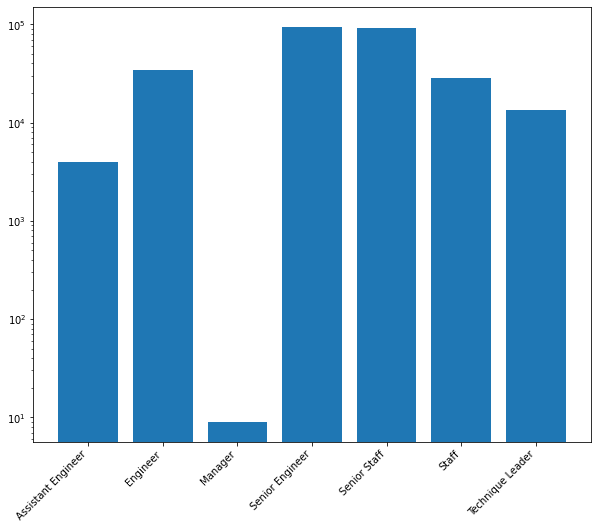

In [116]:
plt.figure(figsize = (10,8))
# emp_tit_cross.plot()

plt.bar(emp_tit_cross.sum().index, emp_tit_cross.sum().values)
plt.xticks(rotation = 45, ha = 'right')
plt.yscale('log')
plt.show()